In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Information

This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.

Citation:
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

In [2]:
df = pd.read_csv('./Admission_Predict.csv')
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


# Exploratory Data Analysis

In [3]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.shape

(400, 9)

In [7]:
df.isnull().values.any()

False

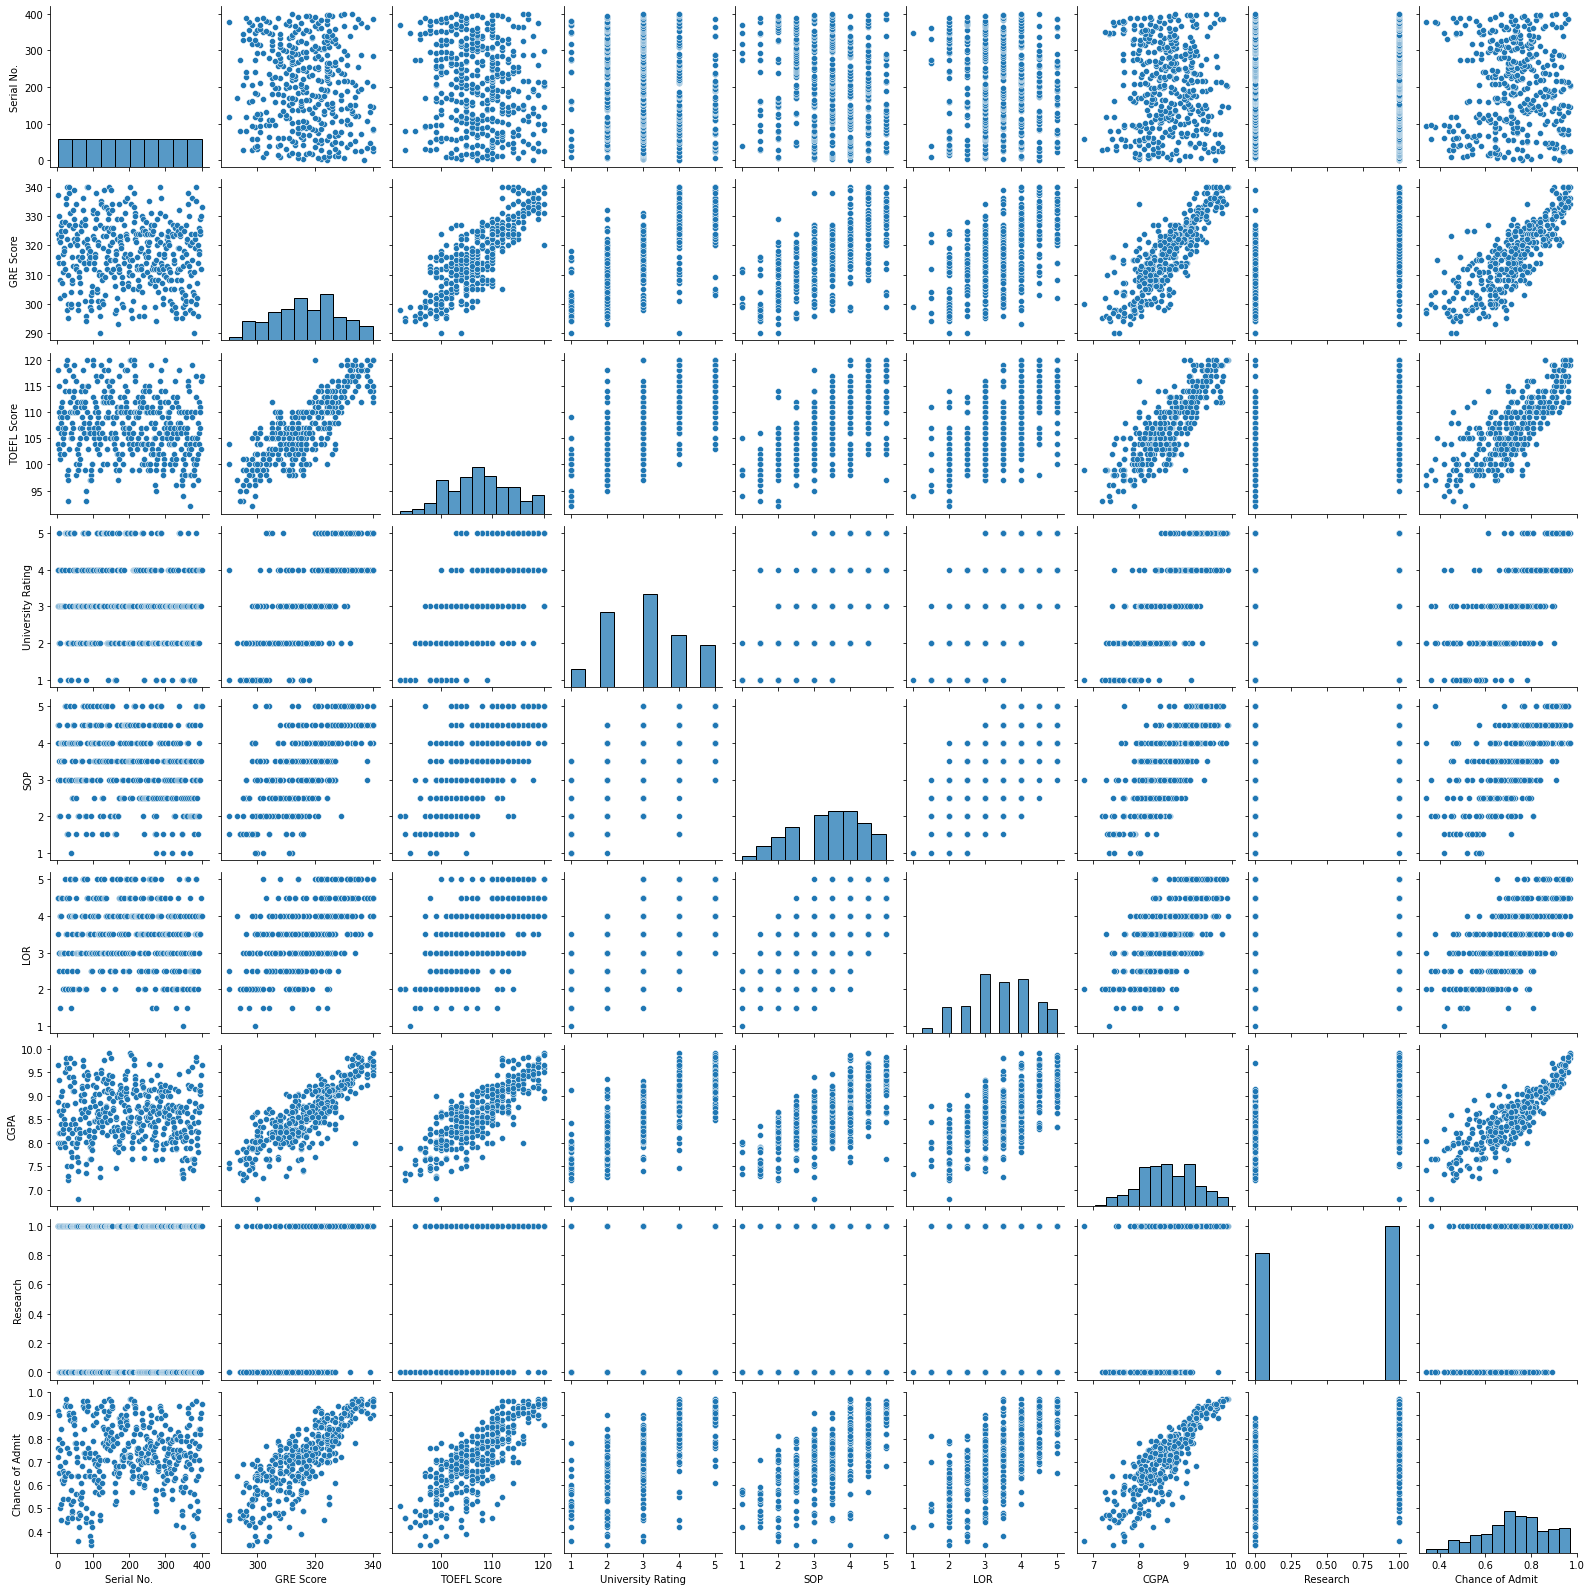

In [8]:
sns.pairplot(df)
plt.show()

### Findings

From the pairplot we can visually notice that our target feature Chance of Admit has a linear relationship with GRE Score, TOEFL Score, and CGPA. In my particular case, the TOEFL doesn't quite apply as I'm a Canadian citizen applying to CA/US/UK universities only.

So for this purpose we'll drop this column.

Notice that GRE, Chance of Admit, and CGPA are all linearly related to each other. So it seems that students that have high CGPAs tend to score well on the GRE. Since students that have a high CGPA and GRE are likely to do well in a graduate academic environment, they tend to have high admittance rates.

In [9]:
df.drop('TOEFL Score', axis=1, inplace=True)
df.head()

,Serial No.,GRE Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,4,4.5,4.5,9.65,1,0.92
1,2,324,4,4.0,4.5,8.87,1,0.76
2,3,316,3,3.0,3.5,8.00,1,0.72
3,4,322,3,3.5,2.5,8.67,1,0.80
4,5,314,2,2.0,3.0,8.21,0,0.65


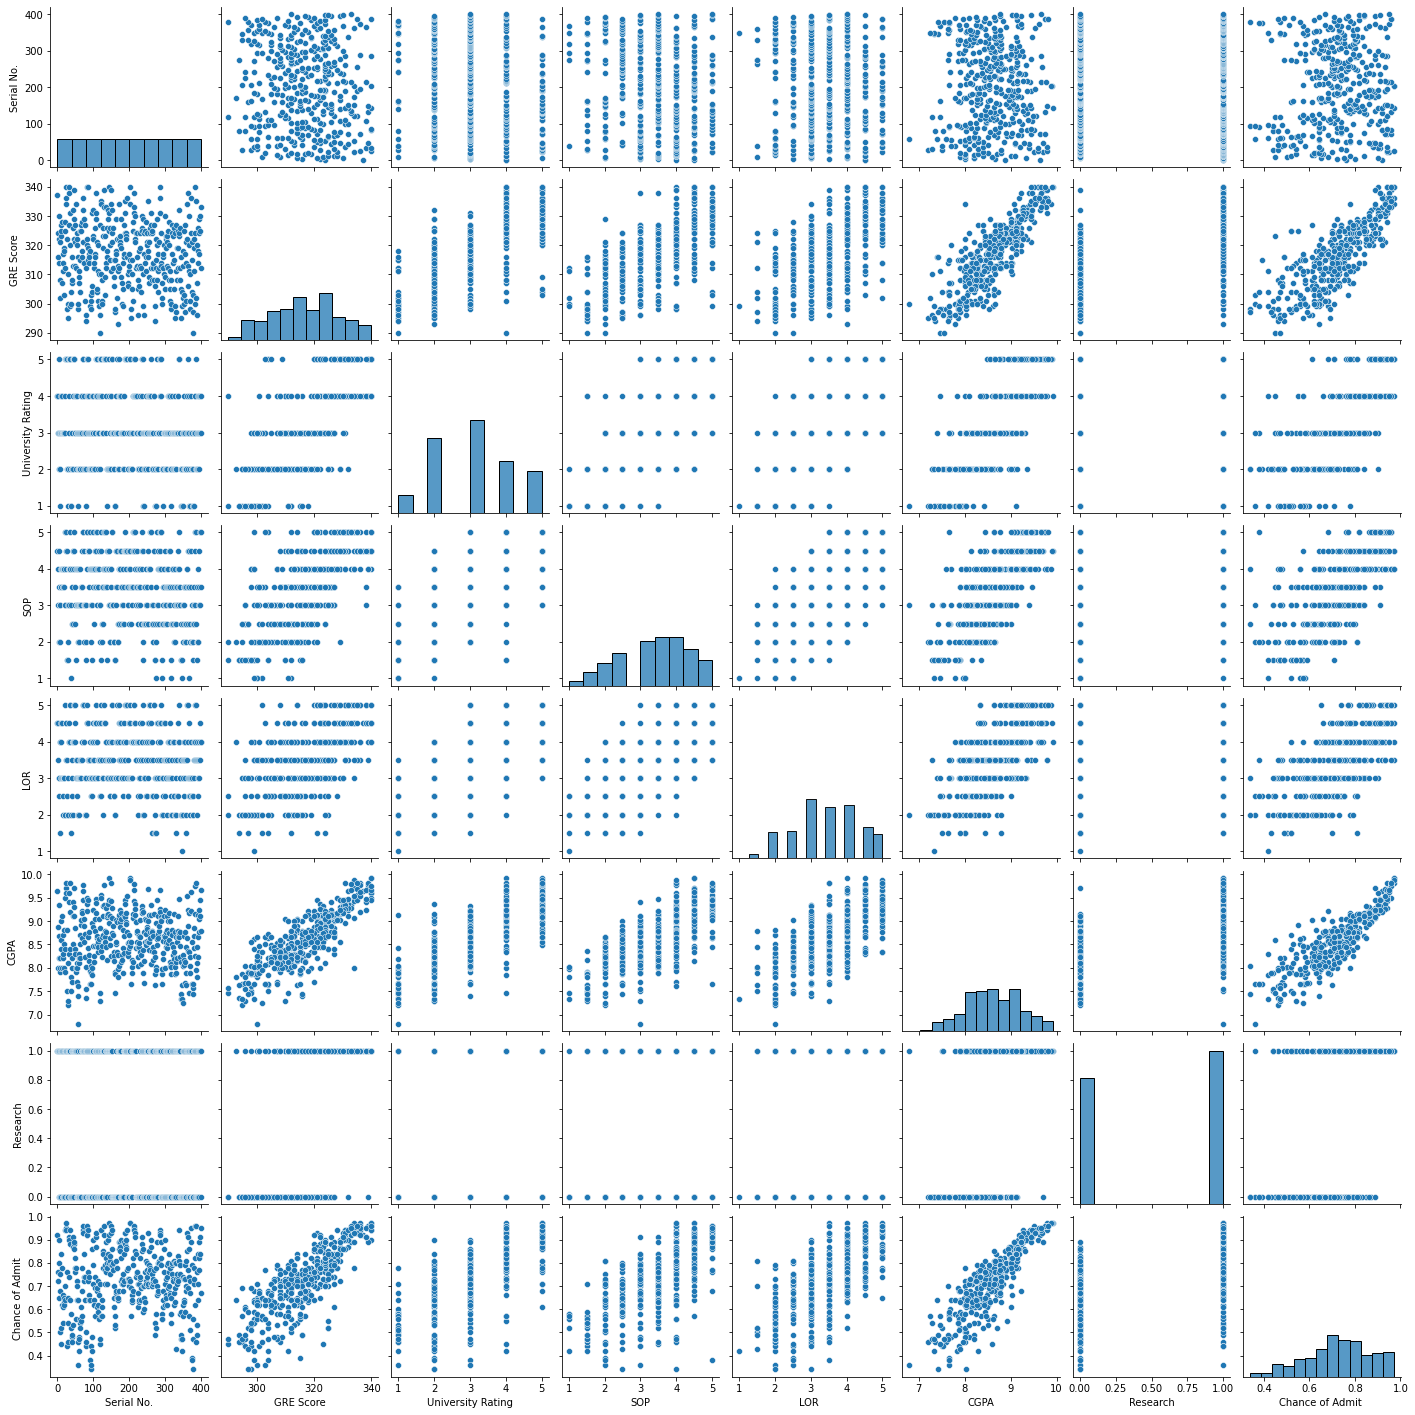

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
df.corr()

,Serial No.,GRE Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
University Rating,-0.169948,0.668976,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

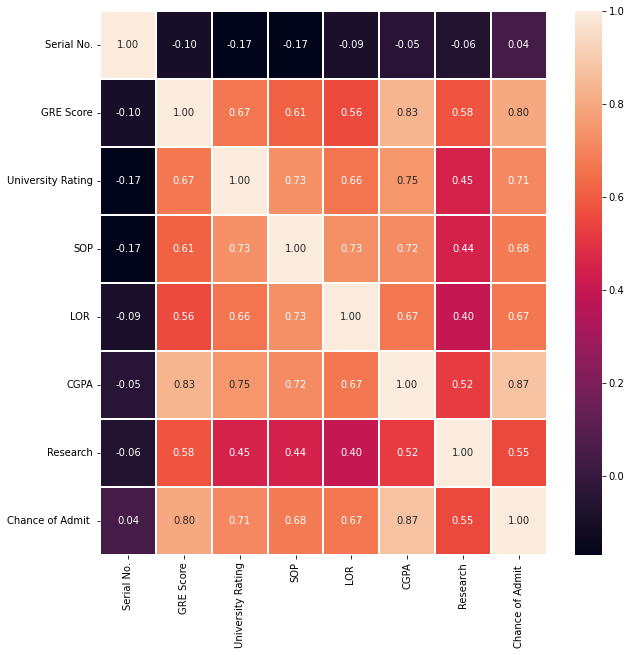

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt='.2f', cmap='rocket')

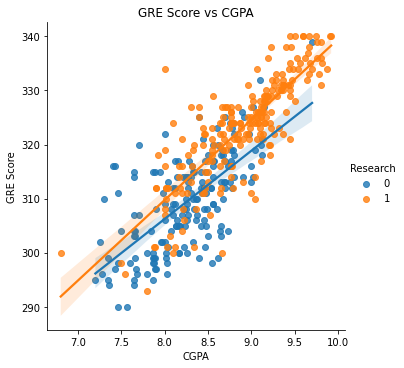

In [13]:
fig = sns.lmplot(x="CGPA", y="GRE Score", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

# Seems that generally, people who have a high CGPA tend to do well on the GRE.
# Also it seems that students who are involved in Research tend to have both higher GPA and GRE scores. Although this isn't a very significant difference.

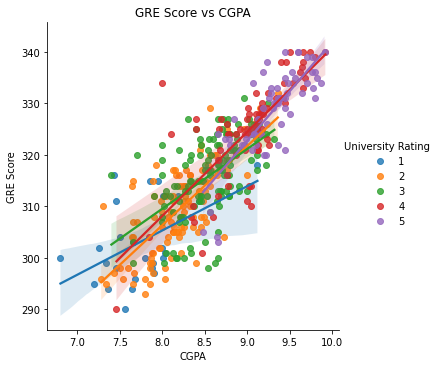

In [14]:
fig = sns.lmplot(x="CGPA", y="GRE Score", data=df, hue="University Rating")
plt.title("GRE Score vs CGPA")
plt.show()

# Interestingly it also seems that coming from a University that is higher in the rankings correlate with higher GRE Scores and CGPA.
# On one hand, it makes sense to think that students who would get into higher rated universities are probably more studious.
# However, it also kind of shows that the higher rated unis are not "more difficult". Or that the students who get in are proportionally
# better at academics.

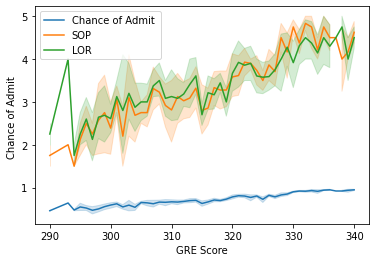

In [15]:
sns.lineplot(x="GRE Score", y="Chance of Admit ", data=df,label='Chance of Admit ')
sns.lineplot(x="GRE Score", y="SOP", data=df,label='SOP')
sns.lineplot(x="GRE Score", y="LOR ", data=df,label='LOR ')
plt.legend(loc=2)
plt.show()

/Users/joshpark/opt/anaconda3/envs/tensor/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


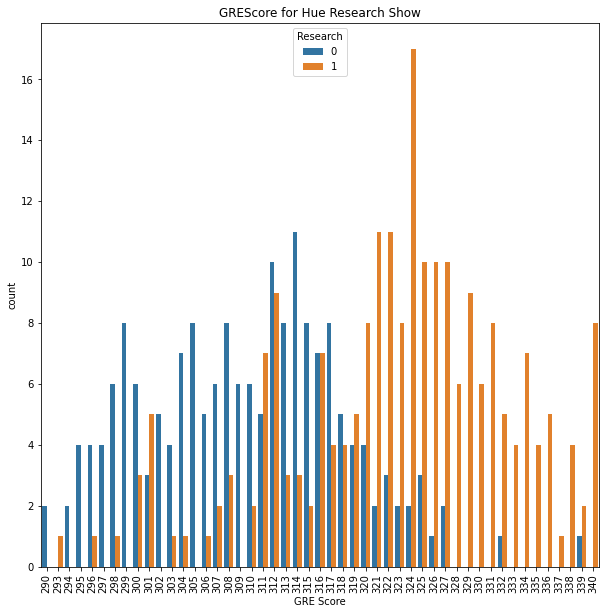

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(df['GRE Score'],hue=df['Research'])
plt.title('GREScore for Hue Research Show')
plt.xticks(rotation=90)
plt.show()

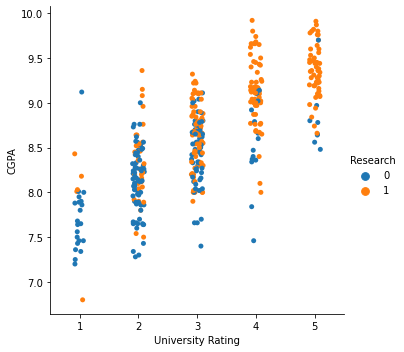

In [17]:
sns.catplot(y="CGPA", x="University Rating", hue="Research", data=df)
plt.show()